<a href="https://colab.research.google.com/github/alexanderVarg/TRABAJO_FINAL/blob/main/01_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA STANDARDIZATION


Exploration of the data, standardization of the values between 0 and 1.

Data is stored in csv file.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt

In [ ]:
import xlrd
df = pd.read_csv("/content/waterQuality1.csv")
df.shape

(7999, 21)

In [ ]:
df.head(1)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.2,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1


**Graphical exploration of the data set**

In [ ]:
#start at first variable
i=0

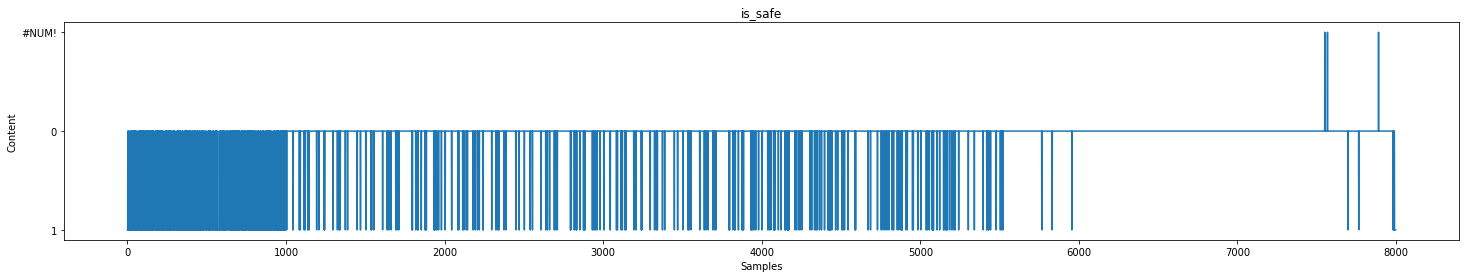

21


In [ ]:
# each time this block is executed the following variable is plotted
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (25,4)
plt.plot(df.iloc[:,i])
plt.ylabel('Content')
plt.xlabel('Samples')
plt.title(df.columns.values[i])
plt.show()

i += 1  # the next time this cell is executed the next variable will be plotted
print(i)

In [ ]:
# Rows with NAN
print(df.isnull().sum(axis = 0))

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [ ]:
# values different from 1 and 0 in the response variable
print(df["is_safe"].value_counts())

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64


In [ ]:
# remove values other than 1 and 0 in the response variable
df.drop(df.loc[df['is_safe']=='#NUM!'].index, inplace=True)

In [ ]:
print(df["is_safe"].value_counts())

0    7084
1     912
Name: is_safe, dtype: int64


Standardize and store training data

In [ ]:
# Standardize the data using the mean and standard deviation
from sklearn.preprocessing import MinMaxScaler
df_training = pd.DataFrame(MinMaxScaler().fit_transform(df.iloc[:,:])) 
# assign the name of the columns that was lost with normalization
df_training.columns=(df.iloc[:,]).columns
print("Numero de observaciones:", df_training.shape)

Numero de observaciones: (7996, 21)


In [ ]:
df_training.head(1)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.326733,0.30615,0.038095,0.576923,0.053846,0.040323,0.922222,0.085,0.033333,0.2,...,0.27,0.810893,0.385666,0.7,0.629062,0.848561,0.8,0.68,0.222222,1.0


In [ ]:
# Store the data scaled between 0 and 1:
df_training.to_csv ('/content/waterQuality_scaled.csv', index = False, header=True)